# The Random Walk

Consider a person leaving a pub after having had a few too many drinks. The individual walks in a certain direction for a few steps, then randomly changes direction and walks in another direction for a few steps, then again randomly changes direction again, and so on. This is known as a [random walk](https://en.wikipedia.org/wiki/Random_walk).

From Wikipedia "*the search path of a foraging animal, the price of a fluctuating stock and the financial status of a gambler: all can be approximated by random walk models, even though they may not be truly random in reality.*" This list does not begin to capture the vast number of applications of random walks. Once we allow ourselves to randomly walk in an arbitrary space, not just the physical space outside of a pub, the range of applications is enormous. 

We will focus exclusively on the [Gaussian random walk](https://en.wikipedia.org/wiki/Random_walk#Gaussian_random_walk) where we take step 
sizes that are random numbers varying according to a normal distribution. 
Such a random walk is closely related to [Brownian motion](https://en.wikipedia.org/wiki/Brownian_motion) and the [Wiener process](https://en.wikipedia.org/wiki/Wiener_process). 

---

In [1]:
# Import libraries including norm (normal distribution) from scipy.stats

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

---
## Simple random walk in one dimension


We will let $X \in \mathbb R$ be our dependent variable, which we can think of as position along a line. It is common to use upper case $X$ for a random dependent variable, so this is what we use here.  We start from some given location, or initial condition, $X_0$. We will take sequence of discrete steps and let $X_n$ denote the value of $X$ at step $n$. Our rule for going from $X_n$ to $X_{n+1}$ is

$$
X_{n+1} = X_n + \xi
$$

where $\xi$ is a random number taken from the standard normal distribution. It is best to look at some Python code. 

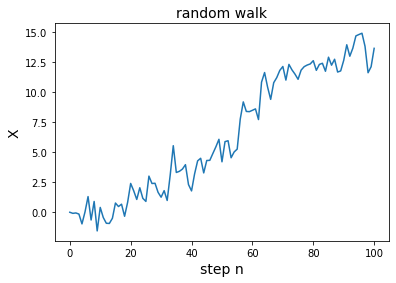

In [2]:
# initial location
X0 = 0

# number of steps to take
Nsteps = 100

# allocate array for X at all steps
X = np.zeros(Nsteps+1)

# initialise array and take Nsteps steps
X[0] = X0;
for n in range(Nsteps):
    X[n+1] = X[n] + np.random.randn(1)
    
# plot the path of X
plt.plot(X)
plt.xlabel("step n", fontsize=14)
plt.ylabel("X", fontsize=14)
plt.title("random walk", fontsize=14)
plt.show()

---

At each step we generate a single, normally distributed, random number using `np.random.randn(1)`. While our rule is expressed in terms of a variable $\xi$, it is unnecessary to explicitly define a separate Python variable corresponding to $\xi$. Note that by default if you call `plt.plot` with a single array, it plots that array on the y axis and uses the index on the x axis. This makes plotting $X_n$ vs $n$ particularly simple.

**Exercise:** as usual with codes that involve random numbers, we suggest that you run the above cell a few times and observe the different paths taken. Each time we run the cell we get a different **sample path**, a different path based on a sample of random numbers.

### Generate many sample paths at the same time

As the exercise illustrates, each time we run the cell we get a different sample path. Each path may be interesting, but it is the statistics of many paths that we care about. To visualise this statistics of many paths we generate many paths -- we release many independent people from the pub and watch what they do (assuming they can pass right through each other). 

We can easily generate many paths simultaneously by generalising our Python variable `X` from a 1D array to a 2D array, where the second index labels the path. This is similar to what we did with systems of ODEs, where we used a 2D array for our solution with the first index corresponding to time and the second index corresponding to component in the system of ODEs. 

**Exercise:** Complete the Python code below to generalise the random walk to `Npaths` sample paths. 
The `for loop` that you need is simple, but it is crucial that you fully understand it. If you need to, recall how we time stepped systems of ODEs. The answer is at the very bottom of the notebook if you get stuck, but try to work this out without looking at the answer. 

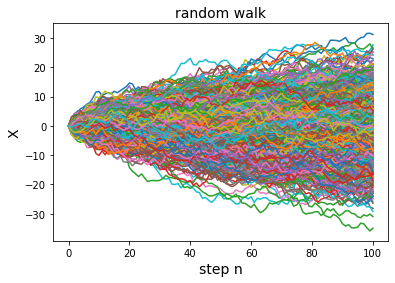

In [17]:
# initial location
X0 = 0

# number of steps and number of paths
Nsteps = 100
Npaths = 1000

# allocate 2D array for solutions
t = np.arange(0,Nsteps+1)
X = np.zeros(shape = (Nsteps+1,Npaths))

# initialise array and take Nsteps steps
X[0,:] = X0;
for n in range(Nsteps):
    X[n+1,:] = X[n,:] + np.random.randn(Npaths)

# plot the path of X
plt.plot(t, X)
plt.xlabel("step n", fontsize=14)
plt.ylabel("X", fontsize=14)
plt.title("random walk", fontsize=14)
plt.show()

**You must get the above cell to execute correctly before continuing, since the rest of the notebook requires it to work correctly.**

---

It is usual to plot time (or in this case step) on the horizontal axis, and we will mostly produce plots in this orientation. However, it is also possible to plot the paths in the other orientation so that the horizontal axis is $X$. This makes is somewhat easier to see `X` as the paths of our individuals as they wander away from the pub and it will be easier to relate these positions to the histograms that we generate next.

To plot the paths in this orientation, we need to pass `plt.plot` a variable corresponding to the step `n`. We use `range` to create a Python variable `step`.

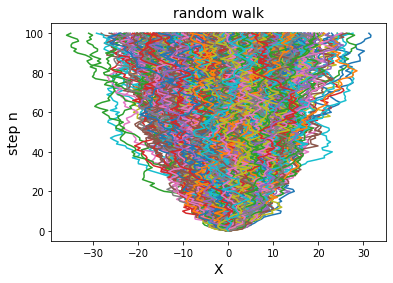

In [18]:
# plot the paths with X on horizontal axis and step n on the vertical axis

step = range(Nsteps+1)

plt.plot(X,step)
plt.xlabel("X", fontsize=14)
plt.ylabel("step n", fontsize=14)
plt.title("random walk", fontsize=14)
plt.show()

### Histograms

As discussed in the week 5 notebook on *Probability and Statistics*, we can visualise a collection of random numbers by looking at histograms (which we will always plot normalised as densities) and we can compute basic statistics such as the mean and standard deviation. Below we plot the histogram and print basic statistics of the positions at the final step. (Once again, make sure that you understand why the `plt.hist` statement plots the histogram at the final step.)

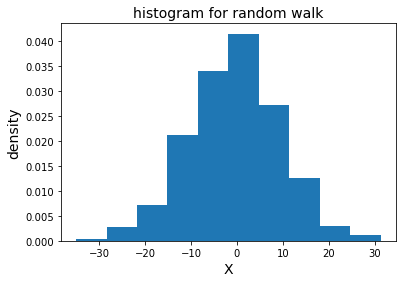

The mean of X is -0.5245940223773354
The standard deviation of X is 9.826778290908726


In [19]:
plt.hist(X[-1,:], density=True)
plt.xlabel("X", fontsize=14)
plt.ylabel("density", fontsize=14)
plt.title("histogram for random walk", fontsize=14)
plt.show()

print("The mean of X is", np.mean(X[-1,:]))
print("The standard deviation of X is", np.std(X[-1,:]))

---

**Exercise:** The above histogram is probably not very good because the number of paths is not sufficiently large. Go back up to the cell where the paths are generated and increase the number of paths to 1000. Re-run that cell. Then re-run the cell just above that generates the histogram. It should be better. It should look approximately Gaussian. The mean should be near zero and the standard deviation should be near 10. 

---

The cell below re-plots the histogram together with a plot of the normal distribution with mean zero and standard deviation 10.

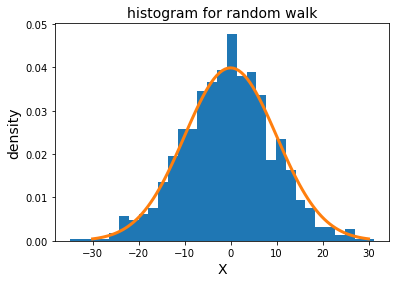

In [20]:
plt.hist(X[-1,:], bins = 31, density=True)
plt.xlabel("X", fontsize=14)
plt.ylabel("density", fontsize=14)
plt.title("histogram for random walk", fontsize=14)

# plot normal distribution with mean 0 and std 10
x = np.linspace(-30 ,30, 101)
y = norm.pdf(x, 0, 10)
plt.plot(x, y, lw=3)

plt.show()

---
# Exercises

1. In the cell above that plots a histogram and normal distribution, add a plot of the histogram at step 25. (Plot the histogram at step 25 first, then the histogram at the last step.) Figure out the parameters of the corresponding normal distribution and plot it. 

---
 
2. In the cell above that plots a histogram and normal distribution, add a plot of the histogram at step 4. Figure out the parameters of the corresponding normal distribution and plot it. 

---

3. By now you should be able to guess how the standard deviation of samples depends on the step $n$. Compute the standard deviation of $X_n$ for all $n$. Look at [this documentation](https://numpy.org/doc/stable/reference/generated/numpy.std.html). `np.std` takes an argument `axis` that "determines the axis along which the standard deviation is computed".  We want the standard deviation along the axis corresponding to the different paths. Try to work this out and plot the the standard deviation as a function of $n$ (Python variable `step`). Compare with the square root of `step`. If you get stuck, look at the solutions below.

---

**Summary:** What you should realise is that as our random walkers wander about, the average position of all walkers is the pub exit, or initial condition $X_0$. The more steps they take the more they spread out. This spreading, as measured by the standard deviation, grows as the square root of the number of steps.


---
# Answers 
---

Expand cells to see answers.

Q1 answer

In [ ]:
# Plots histograms at step 25 and the final step
plt.hist(X[25,:], bins = 31, density=True)
plt.hist(X[-1,:], bins = 31, density=True)
plt.xlabel("X", fontsize=14)
plt.ylabel("density", fontsize=14)
plt.title("histogram for random walk", fontsize=14)

# plot corresponding normal distributions
x = np.linspace(-30, 30, 101)

# mean 0 and std 5
y = norm.pdf(x, 0, 5)
plt.plot(x, y, lw=3)

# mean 0 and std 10
y = norm.pdf(x, 0, 10)
plt.plot(x, y, lw=3)

plt.show()

Q2 answer

In [ ]:
# Plot histograms and normal distributions at steps: 4, 25, and 100 

plt.hist(X[4,:], bins = 31, density=True)
plt.hist(X[25,:], bins = 31, density=True)
plt.hist(X[-1,:], bins = 31, density=True)
plt.xlabel("X", fontsize=14)
plt.ylabel("density", fontsize=14)
plt.title("histogram for random walk", fontsize=14)

# plot corresponding normal distributions
x = np.linspace(-30, 30, 101)

# mean 0 and std 2
y = norm.pdf(x ,0, 2)
plt.plot(x, y, lw=3)

# mean 0 and std 5
y = norm.pdf(x, 0, 5)
plt.plot(x, y, lw=3)

# mean 0 and std 10
y = norm.pdf(x, 0, 10)
plt.plot(x, y, lw=3)

plt.show()

Q3 answer

In [ ]:
# plot standard deviation as a function of n
std = np.std(X, axis=1)

plt.plot(step, std, '.')
plt.plot(step, np.sqrt(step))

plt.xlabel("step n", fontsize=14)
plt.ylabel("standard deviation", fontsize=14)
plt.title("standard deviation of random walk", fontsize=14)
plt.show()

Solution to multiple paths cell

In [ ]:
# initial location
X0 = 0

# number of steps and number of paths
Nsteps = 100
Npaths = 100

# allocate 2D array for solutions
X = np.zeros((Nsteps+1,Npaths))

# initialise array and take Nsteps steps
X[0,:] = X0;
for n in range(Nsteps):
    X[n+1,:] = X[n,:] + np.random.randn(Npaths)

# plot the path of X
plt.plot(X)
plt.xlabel("step n", fontsize=14)
plt.ylabel("X", fontsize=14)
plt.title("random walk", fontsize=14)
plt.show()